In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

In [ ]:
x = torch.tensor([1.,2.,2.]).float()
print(x)
print(x.type())

tensor([1., 2., 2.])
torch.FloatTensor


In [ ]:
y = torch.rand(4,5)
print(y)

tensor([[0.4058, 0.6222, 0.5286, 0.5712, 0.2417],
        [0.5199, 0.7004, 0.3693, 0.9999, 0.0620],
        [0.4248, 0.4557, 0.1707, 0.0892, 0.6532],
        [0.0259, 0.3994, 0.4588, 0.7398, 0.6715]])


In [ ]:
z=torch.zeros(4,5)
print(z)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [ ]:
w = torch.ones(4,5)
print(w)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


In [ ]:
a = torch.tensor([0.,1.,2.]).float()
b = torch.tensor([1.,3.,5.]).float()
c = torch.add(a,b)
print(c)

tensor([1., 4., 7.])


In [ ]:
np_arr = np.array([1.,2.,3.], dtype=np.float32)
tensor = torch.from_numpy(np_arr)  # o torch.tensor(np_arr)
print(tensor)
numpy_arr2 = tensor.numpy() #go back to numpy array
print(numpy_arr2)

tensor([1., 2., 3.])
[1. 2. 3.]


In [ ]:
a = torch.rand(4)
b = torch.rand(4)
if torch.cuda.is_available():
  print("GPU available")
  device = torch.device("cuda")
  a = a.to(device)
  b = b.to(device)
else:
  print("GPU not available")


c = a+b
c = c.cpu()
print(c)



GPU available
tensor([0.9761, 0.7380, 0.2436, 0.7497])


In [ ]:
x = torch.tensor([2.0], requires_grad=True).float()
y = torch.tensor([3.0], requires_grad=True).float()
z = 3*x**2 + y**3
z.backward()
print(f"Derivative of z wrt. x eval in 2.0 dz/dx =  ({x},{x.grad})")
print(f"Derivative of z wrt. y eval in 3.0 dz/dy =  ({y},{y.grad})")

Derivative of z wrt. x eval in 2.0 dz/dx =  (tensor([2.], requires_grad=True),tensor([12.]))
Derivative of z wrt. y eval in 3.0 dz/dy =  (tensor([3.], requires_grad=True),tensor([27.]))


torch.Size([1000])


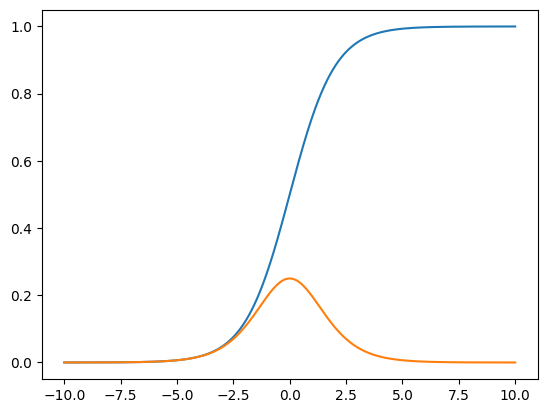

In [ ]:
x = torch.linspace(-10,10,1000, requires_grad=True)
y = torch.sigmoid(x)
print(y.size())
y.sum().backward()   #Trick to calculate derivative of y = sigmoid(x) for each component of xi corresponding to each yi
plt.plot(x.data.numpy(), y.data.numpy(), label='Sigmoid')
plt.plot(x.data.numpy(), x.grad.numpy(), label='Sigmoid_derivative')
plt.show()

In [ ]:
class Net(nn.Module):

    def __init__(self, Ni, Nh, No):
        """
        Ni - Input size
        Nh - Neurons in the hidden layer
        No - Output size
        """
        super().__init__()

        print('Network initialized')
        self.fc1 = nn.Linear(in_features=Ni, out_features=Nh)
        self.out = nn.Linear(in_features=Nh, out_features=No)
        self.act = nn.Sigmoid()

    def forward(self, x):
        x = self.act(self.fc1(x))
        x = self.out(x)
        return x


In [ ]:
Ni = 1
Nh = 32
No = 1
torch.manual_seed(0)
net = Net(Ni, Nh, No)
print(net)

Network initialized
Net(
  (fc1): Linear(in_features=1, out_features=32, bias=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
  (act): Sigmoid()
)


In [ ]:
x = torch.rand(128, 1)   #Initialize input vector of dimension N x Ni = 128 x 1

out = net(x)
#print(f"Output vector: {out}")

In [ ]:

#testing only  (no gradients operations are saved to backprop and update params (to do anyway after the forward pass))
with torch.no_grad():
  out_test = net(x)
#print(f'Output of the test: {out_test}')

In [ ]:
if torch.cuda.is_available():
  print("Can use GPU :)")
  device = torch.device("cuda")
else:
  print("GPU not available D:")
  device = torch.device("cpu")
print(f"Selected device {device}")

#transfer net params to GPU
net.to(device)
# Transfer input data to GPU and computes output
output = net(x.to(device))
#print(output)

Can use GPU :)
Selected device cuda


In [ ]:
#How to define loss function? Already implemented in Pytorch :)
loss_function = nn.MSELoss()
a = torch.rand(10)
b = torch.rand(10)
loss_value = loss_function(a,b)
print(f"Loss function value (precomputed): {loss_value}")
loss2 = np.mean((a.numpy()-b.numpy())**2.)
print(f'Loss calculated analytically: {loss2}')


Loss function value (precomputed): 0.10292629152536392
Loss calculated analytically: 0.10292629152536392


In [ ]:
#Backpropagation
#Create values and labels and put into GPU
x = torch.rand(128,1).to(device)
label = torch.rand(128,1).to(device)
#Forward pass
out = net(x)
#loss function eval
loss = loss_function(out, label)

#Backpropagation
net.zero_grad()
loss.backward()






In [ ]:
#Check
params = next(net.fc1.parameters())
#print("#########################")
#print("#########################")
#print(f"VALUES")
#print("#########################")
#print(params)

#print("\n#########################")
#print("#########################")
#print(f"GRADIENTS")
#print("#########################")
#print(params.grad)

In [ ]:
#Update parameters
x = torch.rand(128, 1).to(device)
label = torch.rand(128, 1).to(device)
loss_function = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001) #Provide the parameters to optimize and the extra parameters i.e. lr.

out = net(x)
loss = loss_function(out, label)
#backpropagation
net.zero_grad()
loss.backward()
#update weights
print(f"A specific weight before update:  {next(net.fc1.parameters())[0]}")
optimizer.step()  #This effectively optimizes the network's parameters
print(f"A specific weight after update: {next(net.fc1.parameters())[0]}")

A specific weight before update:  tensor([-0.0075], device='cuda:0', grad_fn=<SelectBackward0>)
A specific weight after update: tensor([-0.0065], device='cuda:0', grad_fn=<SelectBackward0>)


Dataset: load dataset using the torch.utils.data.Dataset
You need to create a class that inherits from the Dataset class containing three main methods: <br>
1)__init__ to initialize your dataset <br>
2)__len__ to get the lenght of your dataset <br>
3)__getitem__ to get the element of the dataset at the given index <br>

class CustomDataset(Dataset): <br>
  def __init__(self, init_params,\ transform=None): <br>
    self.transform = transform <br>
    [...] <br>
  def __len__(self): <br>
    [...] <br>
  def __getitem__(self, idx): <br>
    [...] <br>
    if self.transform: <br>
      sample = self.transform(sample) <br>
    return(sample) <br>

In [ ]:
def poly_model(x,beta,noise_std=0):
  pol_order=len(beta)
  x_matrix = np.array([x**i for i in range(pol_order)]).T
  y = np.matmul(x_matrix, beta)
  noise = np.random.randn(len(y))*noise_std
  return y+noise

In [ ]:
beta_true = [-1.45, 1.12, 2.3]
noise_std = 0.2
np.random.seed(4)


In [ ]:
#train data
n_train_points = 20
x_train = np.random.rand(n_train_points)
y_train = poly_model(x_train, beta_true, noise_std)

In [ ]:
with open('train_data.csv', 'w') as f:
    data = [f"{x},{y}" for x, y in zip(x_train, y_train)]
    f.write('\n'.join(data))

In [ ]:
#test data
n_test_points=20
x_test = np.random.rand(n_test_points)
y_test = poly_model(x_test, beta_true, noise_std)

with open('test_data.csv', 'w') as f:
  data = [f'{x},{y}' for x,y in zip(x_test, y_test)]
  f.write('\n'.join(data))

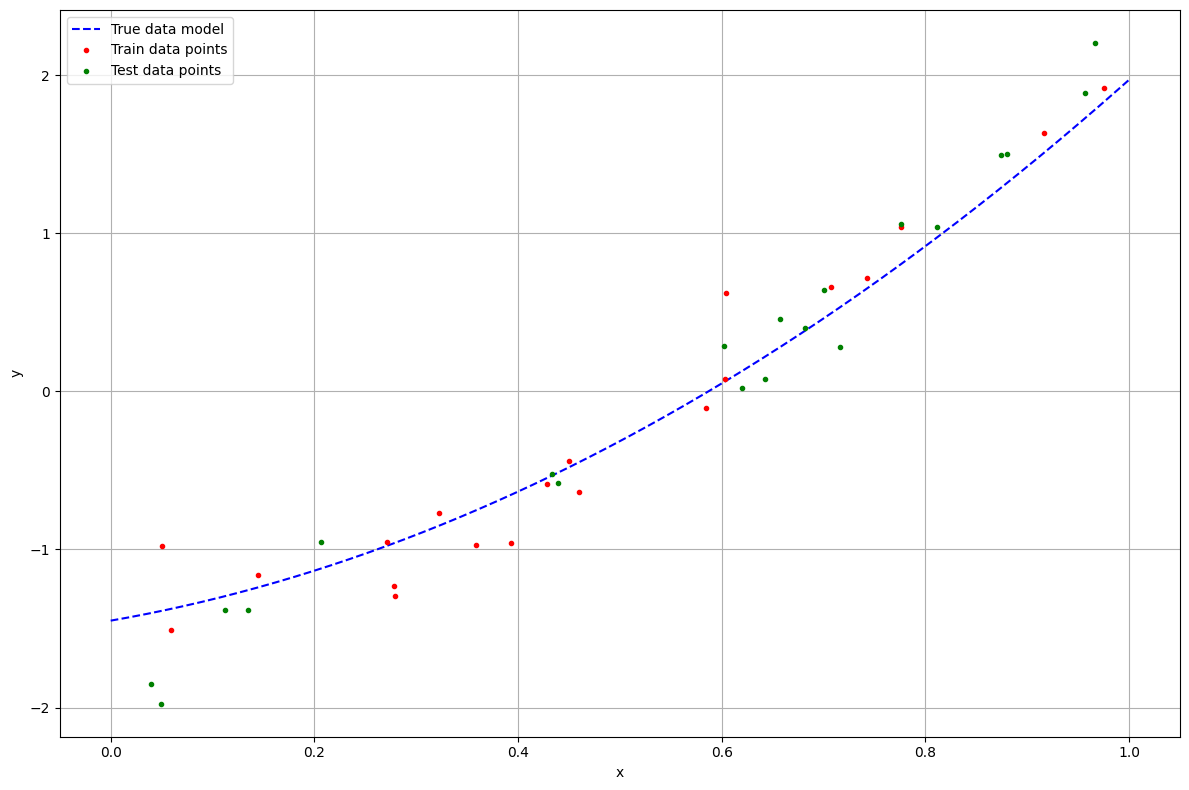

In [ ]:
plt.figure(figsize=(12,8))
x_highres = np.linspace(0,1,1000)
plt.plot(x_highres, poly_model(x_highres, beta_true), color='b', ls='--', label='True data model')
plt.plot(x_train, y_train, color='r', ls='', marker='.', label='Train data points')
plt.plot(x_test, y_test, color='g', ls='', marker='.', label='Test data points')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
class CSVDataset(Dataset):
  def __init__(self, csv_file, transform=None):
    #csv_file = name of the csv file containing the data
    #transform= optional transformation of the dataset, here transform=None means no transformation is applyied
    self.transform=transform
    with open(csv_file, 'r') as f:
      lines = f.read().split('\n')
    self.data = []
    for line in lines:
      sample = line.split(',')
      self.data.append(( float(sample[0]), float(sample[1]) ))

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    sample = self.data[idx]
    if self.transform:
      sample = self.transform(sample)
    return sample




In [ ]:
train_dataset = CSVDataset('train_data.csv')
test_dataset = CSVDataset('test_data.csv')


In [ ]:
print(len(train_dataset))
print(train_dataset[3])
print(len(test_dataset))
print(test_dataset[3])

20
(0.9751545025675137, 1.9199492194189804)
20
(0.8115360977242874, 1.0370631585551935)


In [ ]:
#Transform the data: implement a callable function in the transform class in order to avoid passing every time the parameters of the transform.
class ToTensor(object):
  def __call__(self, sample):
    x, y = sample
    return (torch.Tensor([x]).float(), torch.Tensor([y]).float())



In [ ]:
to_tensor = ToTensor()
sample = (2.3, 3.5)
print(to_tensor(sample))

(tensor([2.3000]), tensor([3.5000]))


In [ ]:
#You can concatenate transformations using the torchvision.transform module
composed_transform = transforms.Compose([ToTensor(),
                                        #other
                                        ])


In [ ]:
#Test of the composed transformation
sample = (2.3, 3.5)
print(composed_transform(sample))

(tensor([2.3000]), tensor([3.5000]))


In [ ]:
#Test with CSV dataset
train_dataset = CSVDataset('train_data.csv', transform=composed_transform)
print(train_dataset[0])

(tensor([0.3591]), tensor([-0.9699]))


In [ ]:
#By using the Dataset class you can also use the Pytorch Dataloader module
#This allows for: Batching the data, Shuffling the data, Load data in parallel using multiprocessing workers

In [ ]:
nw=0
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=nw)

for i_batch, sample_batched in enumerate(train_dataloader):
    print('#################')
    print(f'# BATCH {i_batch}')
    print('#################')
    x_batch = sample_batched[0]
    label_batch = sample_batched[1]
    print(f"INPUT DATA (shape: {x_batch.shape})")
    print(x_batch)
    print(f"LABELS (shape: {label_batch.shape})")
    print(label_batch)

#################
# BATCH 0
#################
INPUT DATA (shape: torch.Size([4, 1]))
tensor([[0.2792],
        [0.1450],
        [0.9752],
        [0.6039]])
LABELS (shape: torch.Size([4, 1]))
tensor([[-1.2921],
        [-1.1605],
        [ 1.9199],
        [ 0.6225]])
#################
# BATCH 1
#################
INPUT DATA (shape: torch.Size([4, 1]))
tensor([[0.6032],
        [0.0593],
        [0.3220],
        [0.7427]])
LABELS (shape: torch.Size([4, 1]))
tensor([[ 0.0754],
        [-1.5111],
        [-0.7687],
        [ 0.7168]])
#################
# BATCH 2
#################
INPUT DATA (shape: torch.Size([4, 1]))
tensor([[0.7762],
        [0.2713],
        [0.3929],
        [0.4598]])
LABELS (shape: torch.Size([4, 1]))
tensor([[ 1.0361],
        [-0.9533],
        [-0.9567],
        [-0.6366]])
#################
# BATCH 3
#################
INPUT DATA (shape: torch.Size([4, 1]))
tensor([[0.0505],
        [0.4499],
        [0.4286],
        [0.7075]])
LABELS (shape: torch.Size([4, 1]